## MATH485 Assignment #2

### Tasks

#### Task1 Dataset Exploration

1. Load the Diabetes dataset using sklearn.datasets.load_diabetes().
2. Explore the dataset and describe the features and target variables.
3. Split the dataset into training and testing sets using an 80-20 split.

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# task1 -1
df = datasets.load_diabetes()
feature_names = df.feature_names
target = df.target
df = pd.DataFrame(df.data, columns=df.feature_names)
df['target'] = target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


(array([ 6., 32., 45., 35., 42., 26., 29., 33., 19., 31., 24., 17., 18.,
        20., 21., 21.,  9.,  8.,  2.,  4.]),
 array([ 25.  ,  41.05,  57.1 ,  73.15,  89.2 , 105.25, 121.3 , 137.35,
        153.4 , 169.45, 185.5 , 201.55, 217.6 , 233.65, 249.7 , 265.75,
        281.8 , 297.85, 313.9 , 329.95, 346.  ]),
 <BarContainer object of 20 artists>)

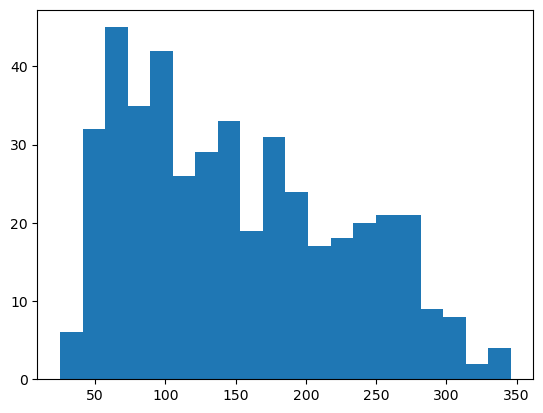

In [22]:
# task1-2


# target
y = df['target']
plt.hist(y, bins=20)

In [17]:
# task1-3
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

#### Task2 Linear Regression Model
 1. Train a linear regression model on the training set.
 2.  Evaluate the model on the test set using the R2 score.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#task2-1
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#task2-2
r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2:.4f}")

R2 score: 0.4526


array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

#### Task3 Implement Recursive Feature Elimination(RFE)
 1. Perform RFE using the linear regression model as the base estimator.
 2. Start with all 10 features and iteratively eliminate the least important feature until only
one feature remains.
 3. Track the R2 score at each iteration and the coefficients for each feature.
 4. Visualize the R2 score as a function of the number of retained features.
 5. Identify the optimal number of features using a threshold for significant R2 improvement
(e.g., 0.01). [5%]

In [28]:
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(model, n_features_to_select=10,step=1)
rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [89]:
# task3-2
selected_features = {}
r2_scores = []
model_coef = []

for i in range(len(X_train.columns),0, -1):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=i, step=1)
    rfe.fit(X_train, y_train)

    current_feature = X_train.columns[rfe.support_]
    selected_features[i] = current_feature

    X_reduced_train = X_train[current_feature]
    X_reduced_test = X_test[current_feature]
    model.fit(X_reduced_train, y_train)

    full_coef = pd.Series(0, index=feature_names)
    full_coef[current_feature] = model.coef_
    model_coef.append(full_coef)
    y_pred = model.predict(X_reduced_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

/var/folders/rd/0gc692sj3zjcy1df54_b4mfr0000gn/T/ipykernel_20041/552996601.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  full_coef[current_feature] = model.coef_
/var/folders/rd/0gc692sj3zjcy1df54_b4mfr0000gn/T/ipykernel_20041/552996601.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-236.64958836  542.79950849  354.21143776 -936.35058892  528.79659179
  167.80041416  270.39651439  744.44742867   53.3504835 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  full_coef[current_feature] = model.coef_
/var/folders/rd/0gc692sj3zjcy1df54_b4mfr0000

In [78]:
# task3-3
selected_features

{10: Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object'),
 9: Index(['sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object'),
 8: Index(['sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5'], dtype='object'),
 7: Index(['sex', 'bmi', 'bp', 's1', 's2', 's4', 's5'], dtype='object'),
 6: Index(['sex', 'bmi', 'bp', 's1', 's2', 's5'], dtype='object'),
 5: Index(['bmi', 'bp', 's1', 's2', 's5'], dtype='object'),
 4: Index(['bmi', 's1', 's2', 's5'], dtype='object'),
 3: Index(['bmi', 's1', 's5'], dtype='object'),
 2: Index(['bmi', 's5'], dtype='object'),
 1: Index(['bmi'], dtype='object')}

Text(0, 0.5, 'R2 Score')

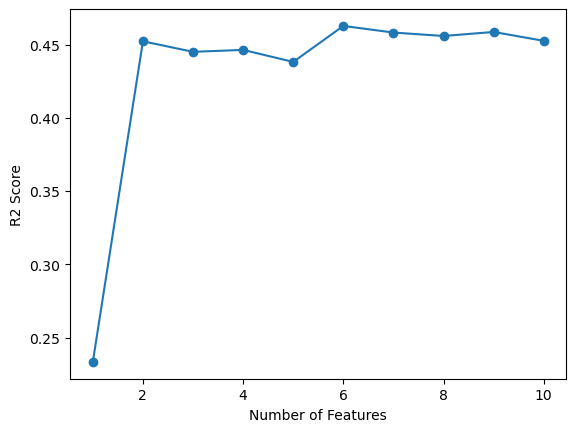

In [80]:
# task3-4
r2_scores_df = pd.DataFrame(r2_scores[::-1])
plt.plot(range(1, len(X_train.columns)+1), r2_scores_df, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('R2 Score')

In [58]:
r2_scores

[0.45260276297191937,
 0.4586588697581956,
 0.4559010325046122,
 0.4582553084724289,
 0.4627767079320302,
 0.43820139338997743,
 0.4464044355210376,
 0.4450948811323354,
 0.4522925957397933,
 0.2333503981587215]

In [62]:
# task3-5
diff_r2_scores = []
for i in range(1, len(r2_scores)):
    diff = r2_scores[i] - r2_scores[i-1]
    diff_r2_scores.append(diff)
diff_r2_scores

[0.006056106786276216,
 -0.0027578372535833617,
 0.002354275967816677,
 0.004521399459601283,
 -0.02457531454205275,
 0.008203042131060156,
 -0.0013095543887021721,
 0.0071977146074578835,
 -0.2189421975810718]

#### Task4 Analyze Feature Importance
1. Create a table showing the coefficients of each feature at each iteration of RFE.
2. Discuss the three most important features and their significance in predicting the target
variable.
3. Compare the initial feature ranking with the final set of selected features.

In [ ]:
# task4-1
coef_df = pd.DataFrame(model_coef)
coef_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,37.904021,-241.964362,542.428759,347.703844,-931.488846,518.062277,163.419983,275.317902,736.198859,48.670657
1,0.000000,-236.649588,542.799508,354.211438,-936.350589,528.796592,167.800414,270.396514,744.447429,53.350483
2,0.000000,-233.754686,550.744365,363.791753,-947.823133,541.585796,172.250588,277.741072,761.921177,0.000000
3,0.000000,-235.364224,551.866448,362.356114,-660.643160,343.348089,0.000000,185.140764,664.774591,0.000000
4,0.000000,-215.267423,557.314167,350.178667,-851.515734,591.093315,0.000000,0.000000,803.121285,0.000000
5,0.000000,0.000000,597.892739,306.647913,-655.560612,409.622184,0.000000,0.000000,728.643647,0.000000
6,0.000000,0.000000,691.460102,0.000000,-592.977874,362.950323,0.000000,0.000000,783.168538,0.000000
7,0.000000,0.000000,737.685594,0.000000,-228.339889,0.000000,0.000000,0.000000,680.224653,0.000000
8,0.000000,0.000000,732.109021,0.000000,0.000000,0.000000,0.000000,0.000000,562.226535,0.000000
9,0.000000,0.000000,998.577689,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


##### task4-2
The most important features are bmi, s1, and s5 since they have the largest absolute coefficient values in the first RFE step which are included all features. Furthermore, as progressing the RFE process, three features remain in the model until the firnal three step of RFE. 

##### task4-3
The initial ranking based on absolute coefficient values identified bmi as the most important features. After applying RFE, bmi was ultimately selected as the final remaining feature. This indicates that the initial ranking was largely consistent with the RFE results.

#### Task5 Reflection
1. What did you learn about feature selection using RFE?
2. How does RFE compare to other feature selection methods like LASSO in terms of
methodology and results?
3. What insights can you draw about the dataset from the selected features?

##### task5-1
Through this task, I learned that RFE systematically removes less important features based on model coefficients and evaluates model performance at each step. It helps identify which variables contribute most to prediction while reducing model complexity. I also observed that the most influential features tend to remain until the final stages of the elimination process.

##### task5-2
RFE basically is the recursive method that repeatedly fits the model while removing the least important feature at each step. It leads to computationally less efficency, however, we can control the number of features that we want to use for fitting. In contrast, LASSO is a penalized linear regression method that performs feature selection through L1 regularization, shrinking some coefficients to zero during a single training process, thus we don't have to fit again and again to decide to which features are the least important. But the number of selected features depends on the regularization parameter rather than being directly specified by us.